#  1. About The Company
Bellabeat, founded by Urška Sršen and Sando Mur, is a tech company known for its health-focused smart products designed with artistic flair. Since its establishment in 2013, Bellabeat has swiftly become a prominent wellness brand for women, offering insights into activity, sleep, stress, and reproductive health. By 2016, the company had expanded globally, offering its products through various online retailers and its e-commerce platform. Bellabeat prioritizes digital marketing, maintaining an active presence on platforms like Google, Facebook, Instagram, and Twitter, alongside running targeted video and display ads.

# 2. Scenario
Bellabeat, though successful as a small company, aims to expand its presence in the global smart device market. Urška Sršen, co-founder and Chief Creative Officer, sees potential in analyzing smart device fitness data to drive growth. As part of this initiative, I've been tasked with analyzing consumer usage data for one of Bellabeat's products. The insights gained will inform the company's marketing strategy. My analysis and recommendations will be presented to the Bellabeat executive team for strategic decision-making.


# 3. Business Task
* Conducting market analysis and identifying growth opportunities in the global smart device market.
* Analyzing smart device fitness data to understand consumer behavior and usage patterns.
* Presenting findings and insights to the Bellabeat executive team.
* Formulating high-level recommendations for Bellabeat's marketing strategy based on the analysis.
* Collaborating with the marketing team to implement the recommended strategies.
* Monitoring and evaluating the effectiveness of the marketing strategies implemented.
* Iterating and refining marketing approaches based on ongoing analysis and feedback.

#### I will follow the steps of these data analysis process: **ask, prepare, process, analyze, share, and act.**

# 4. Ask
Sršen asks me to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices.
She then wants me to select one Bellabeat product to apply these insights to in my presentation. These questions will guide my analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

I will produce a report with the following deliverables:
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of my analysis
5. Supporting visualizations and key findings
6. My top high-level content recommendations based on my analysis

# 5. Prepare
Sršen encouraged me to use public data that explores smart device users’ daily habits. She points to a specific data set:
● **FitBit Fitness Tracker Data** (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty fitbit users. 
Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. 
It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.
Sršen tells me that this data set might have some **limitations,** and encourages me to consider adding another data to help address those limitations as i begin to work more with this data.

## 5.1 Information about the Dataset
* Generated by respondents from a survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.
* 30 FitBit users consented to the submission of personal tracker data.
* Data collected incldes physical activity recorded in minutes, heart rate, sleep monitoring, daily activity and steps.

## 5.2 Limitations
* Data is collected 7 years ago in 2016. Users daily activity, fitness and sleeping patterns, and diets may have changed since then. Data may not be timely or relevant.
* Sample size of 30 Fitbit users us not representative of the entire fitness population.
* Data is collected in survey, so intergrity can't be ascertained.

# 6. Process and Analyse
I chose **R** as my tool for analysis because its very convenient to clean, analyse and visualise my data, all in one place.

### 6.1 Install and Load the Packages

In [1]:
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 6.2 Loading The DataFrames

In [2]:
daily_activity <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_day <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heartrate_seconds <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
weight <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_

#### 6.2.1 Getting looks into our loaded dataframes

In [3]:
head(daily_activity)
head(sleep_day)
head(weight)
head(heartrate_seconds)
colnames(daily_activity)
colnames(sleep_day)
colnames(weight)
colnames(heartrate_seconds)
str(daily_activity)
str(sleep_day)
str(weight)
str(heartrate_seconds)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

[1] "Id"    "Time"  "Value"

spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

### 6.2.2 To see distinct participants in all the data frames.

In [4]:
n_distinct(daily_activity$Id)
n_distinct(sleep_day$Id)
n_distinct(weight$Id)
n_distinct(heartrate_seconds$Id)

[1] 33

[1] 24

[1] 8

[1] 14

### 6.2.3 Check for duplicates

In [5]:
sum(duplicated(daily_activity))
sum(duplicated(sleep_day))
sum(duplicated(weight))
sum(duplicated(heartrate_seconds))

[1] 0

[1] 3

[1] 0

[1] 0

### 6.2.3.1 Remove Duplicates

In [6]:
sleep_day_2 <- sleep_day %>% 
  distinct() 
sum(duplicated(sleep_day_2))

[1] 0

### 6.3 Summarise Data to get insight

In [7]:
daily_activity %>% 
  select(TotalSteps,TotalDistance,SedentaryMinutes,Calories) %>%
  summary()
daily_activity %>% 
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>% 
  summary()
sleep_day_2 %>% 
  select(TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed) %>% 
  summary()
heartrate_seconds %>% 
  select(Value) %>% 
  summary()
weight %>% 
  select(WeightKg,BMI) %>% 
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

     Value       
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

### 6.3.1 Daily Activity Insights
**Steps:**
The summary shows that the average steps per day is 7638 steps.

**Sedentary Minutes:**
Participants have an average of 991 sedentary minutes.

**Sleep:**
Participants slept for an average of 419 minutes and stayed in bed for 458 minutes.

**Calories:**
The average calories burned per day is 2304. 

**Active:**
More participants are lightly active.

**Heart Rate**
Participants have an average of 77bpm.

**Weight**
Users have an average weight of 72kg and average BMI of 25.19.



### 6.4 Merging Dataframes
#### 6.4.1 Change Date Format 
To merge Dataframes, i have to ensure consistency between the date columns between the daily_activity and sleep_day dataframes.
First i rename all Date formats to be consistent across all dataframes, then i trimmed to remove leading and trailing spaces.

In [8]:
daily_activity2 <- daily_activity %>% 
  mutate(ActivityDate=trimws(ActivityDate)) %>% 
  rename(Date=ActivityDate)
sleep_day_3 <- sleep_day_2 %>% 
  mutate(SleepDay=trimws(SleepDay)) %>% 
  rename(Date=SleepDay)
heartrate_seconds2 <- heartrate_seconds %>%
  mutate(Time=trimws(Time)) %>% 
  rename(Date=Time)
weight2 <- weight %>% 
  mutate(Date=trimws(Date))

### 6.4.2 Now to convert to date format
First convert the daily activity dataframe.

In [9]:
daily_activity_cleaned <- daily_activity2 %>% 
  mutate(Date=as_date(Date,format="%m/%d/%Y"))
str(daily_activity_cleaned)
View(daily_activity_cleaned)

tibble [940 × 15] (S3: tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Date                    : Date[1:940], format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 164 233 264 205 211 ...
 $ S

Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,2016-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,2016-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


#### Now to convert the sleep dataframe

In [10]:
sleep_day_cleaned <- sleep_day_3 %>% 
  mutate(Date=as.Date(Date,format="%m/%d/%Y %I:%M:%S %p"))
View(sleep_day_cleaned)
str(sleep_day_cleaned)

Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320
1503960366,2016-04-20,1,360,377
1503960366,2016-04-21,1,325,364
1503960366,2016-04-23,1,361,384


tibble [410 × 5] (S3: tbl_df/tbl/data.frame)
 $ Id                : num [1:410] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Date              : Date[1:410], format: "2016-04-12" "2016-04-13" ...
 $ TotalSleepRecords : num [1:410] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:410] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:410] 346 407 442 367 712 320 377 364 384 449 ...


#### Then the weight dataframes
These conversions are necessary because im going to merge these data frames.

In [11]:
weight_cleaned <- weight2 %>% 
  mutate(Date=as.Date(Date,format="%m/%d/%Y %I:%M:%S %p"))
View(weight_cleaned)
str(weight_cleaned)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,2016-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,2016-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,2016-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12
4319703577,2016-05-04,72.3,159.3942,NA,27.38,TRUE,1.462406e+12
4558609924,2016-04-18,69.7,153.6622,NA,27.25,TRUE,1.461024e+12
4558609924,2016-04-25,70.3,154.9850,NA,27.46,TRUE,1.461629e+12


tibble [67 × 8] (S3: tbl_df/tbl/data.frame)
 $ Id            : num [1:67] 1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : Date[1:67], format: "2016-05-02" "2016-05-03" ...
 $ WeightKg      : num [1:67] 52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num [1:67] 116 116 294 125 126 ...
 $ Fat           : num [1:67] 22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num [1:67] 22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: logi [1:67] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ LogId         : num [1:67] 1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


### 6.4.3 Now to merge dataframes
I merged the activity and sleep data frames together in order to analyse the relationship between them and get insights.

In [12]:
daily_merged_data <- merge(sleep_day_cleaned, daily_activity_cleaned, by=c('Id','Date'))
head(daily_merged_data)
View(daily_merged_data)

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,1,327,346,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,2,384,407,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-15,1,412,442,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,2016-04-16,2,340,367,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,2016-04-17,1,700,712,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,2016-04-19,1,304,320,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,2,384,407,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-15,1,412,442,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,2,340,367,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,1,700,712,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,2016-04-19,1,304,320,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,2016-04-20,1,360,377,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786
1503960366,2016-04-21,1,325,364,9819,6.34,6.34,0,1.34,0.35,4.65,0,19,8,211,838,1775
1503960366,2016-04-23,1,361,384,14371,9.04,9.04,0,2.81,0.87,5.36,0,41,21,262,732,1949


Then i proceeded to merge the daily activity and weight dataframes

In [13]:
daily_activity_weight <- merge(weight_cleaned, daily_activity_cleaned, by=c('Id','Date'))
head(daily_activity_weight)
View(daily_activity_weight)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,TotalSteps,TotalDistance,⋯,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12,14727,9.71,⋯,0,3.21,0.57,5.92,0.00,41,15,277,798,2004
2,1503960366,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,15103,9.66,⋯,0,3.73,1.05,4.88,0.00,50,24,254,816,1990
3,1927972279,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,356,0.25,⋯,0,0.00,0.00,0.25,0.00,0,0,32,986,2151
4,2873212765,2016-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12,8859,5.98,⋯,0,0.13,0.37,5.47,0.01,2,10,371,1057,1970
5,2873212765,2016-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12,7566,5.11,⋯,0,0.00,0.00,5.11,0.00,0,0,268,720,1431
6,4319703577,2016-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12,29,0.02,⋯,0,0.00,0.00,0.02,0.00,0,0,3,1363,1464


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,TotalSteps,TotalDistance,⋯,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12,14727,9.71,⋯,0.000000,3.21,0.57,5.92,0.00,41,15,277,798,2004
1503960366,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,15103,9.66,⋯,0.000000,3.73,1.05,4.88,0.00,50,24,254,816,1990
1927972279,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,356,0.25,⋯,0.000000,0.00,0.00,0.25,0.00,0,0,32,986,2151
2873212765,2016-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12,8859,5.98,⋯,0.000000,0.13,0.37,5.47,0.01,2,10,371,1057,1970
2873212765,2016-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12,7566,5.11,⋯,0.000000,0.00,0.00,5.11,0.00,0,0,268,720,1431
4319703577,2016-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12,29,0.02,⋯,0.000000,0.00,0.00,0.02,0.00,0,0,3,1363,1464
4319703577,2016-05-04,72.3,159.3942,NA,27.38,TRUE,1.462406e+12,10429,7.02,⋯,0.000000,0.59,0.58,5.85,0.00,8,13,313,1106,2282
4558609924,2016-04-18,69.7,153.6622,NA,27.25,TRUE,1.461024e+12,8940,5.91,⋯,0.000000,0.98,0.93,4.00,0.00,14,15,331,1080,2116
4558609924,2016-04-25,70.3,154.9850,NA,27.46,TRUE,1.461629e+12,8095,5.35,⋯,0.000000,0.59,0.25,4.51,0.00,18,10,340,993,2225


## 6.5 VISUALIZATIONS

### 6.5.1 Visualise the relationship between Steps taken and Calories intake
I wanted to know if there was a correlation between steps taken and calories burned. I created a scatterplot to show this relationship.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


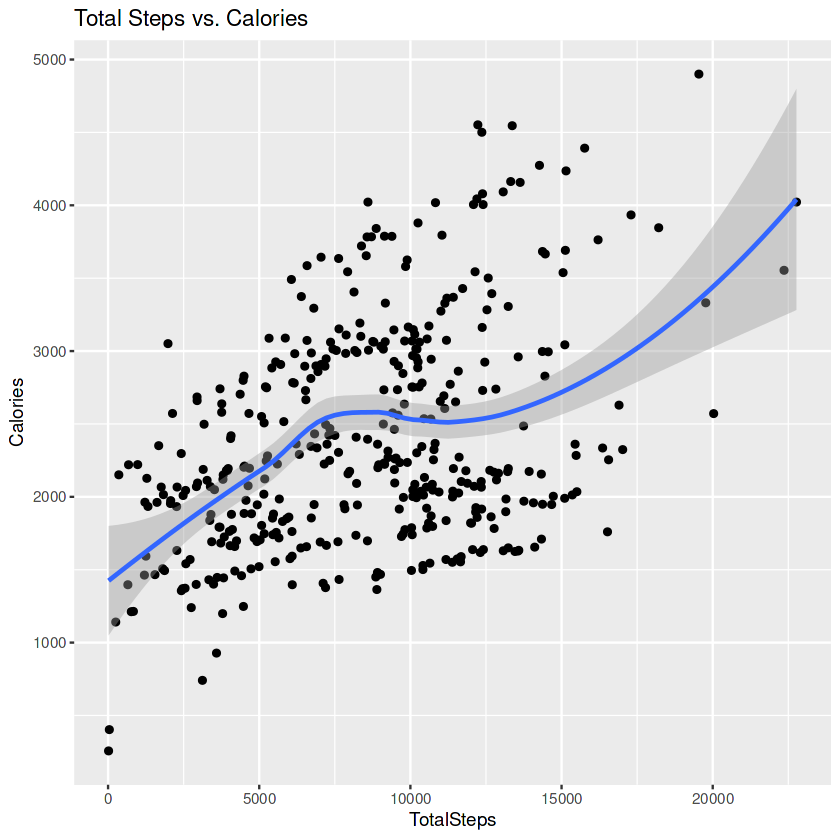

In [14]:
ggplot(data=daily_merged_data, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")

#### 6.5.1.1 INSIGHTS
A clear positive correlation emerges between the number of steps taken and the calories expended. This suggests that the greater the number of steps walked, the higher the potential calorie burned.

### 6.5.2 Visualisation of Daily steps and sleep
To see the relationship between daily steps and sleep, i created another scatterplot.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


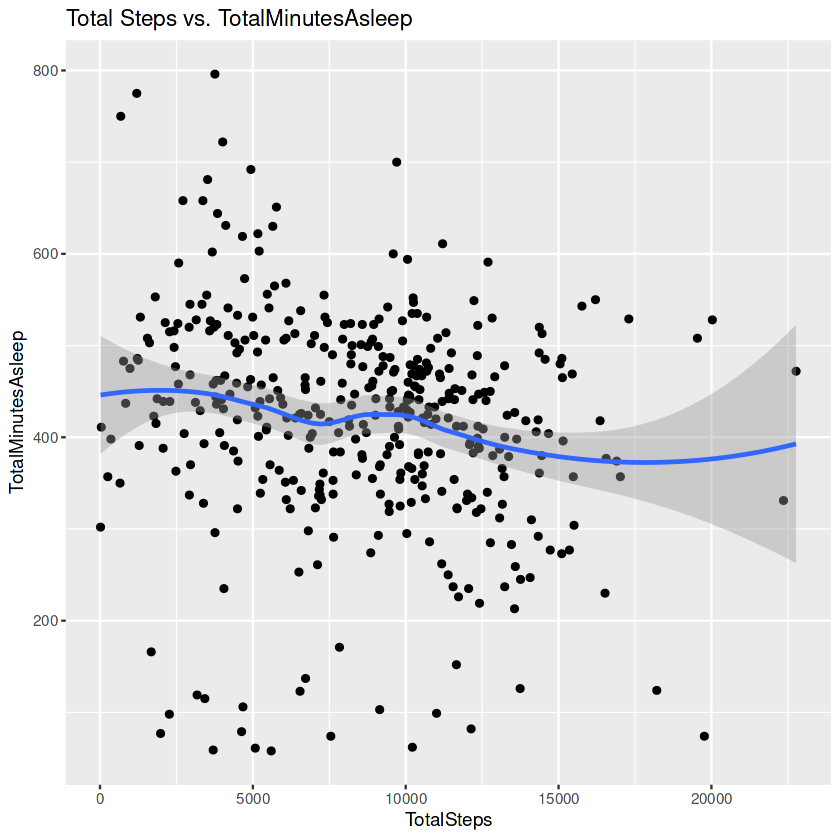

In [15]:
ggplot(data=daily_merged_data, aes(x=TotalSteps, y=TotalMinutesAsleep)) + 
  geom_point() + geom_smooth() + labs(title="Total Steps vs. TotalMinutesAsleep")

#### 6.5.2.1 INSIGHTS
Here, it appears that there is no discernible correlation between the total number of steps taken and the total minutes asleep.

### 6.5.3 Visualisation of Distance and Total Calories

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


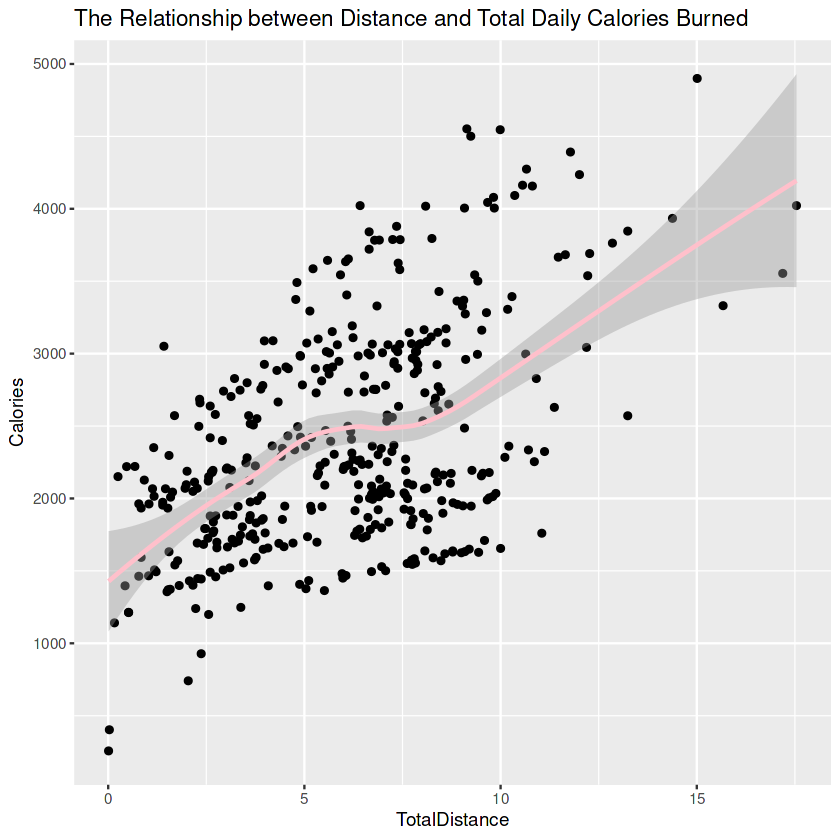

In [16]:
ggplot(daily_merged_data, aes(x=TotalDistance,y= Calories))+
  geom_point() +
  geom_smooth(col='pink') +
  labs(title="The Relationship between Distance and Total Daily Calories Burned")

### 6.5.3.1 INSIGHTS
A positive correlation between distance covered and total calories burned is evident from the plotted data.

### Use of smart device
To get the daily usage of the smart device, i'll the group by and summarise function to count distinct users and how often they used the device. Grouping into "low use", "moderate use" and "high use".

In [17]:
daily_use <- daily_merged_data %>%
  group_by(Id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(usage = case_when(
    days_used >= 1 & days_used <= 10 ~ "low use",
    days_used >= 11 & days_used <= 20 ~ "moderate use", 
    days_used >= 21 & days_used <= 31 ~ "high use", 
  ))
View(daily_use)
n_distinct(daily_merged_data$Id)

Id,days_used,usage
<dbl>,<int>,<chr>
1503960366,25,high use
1644430081,4,low use
1844505072,3,low use
1927972279,5,low use
2026352035,28,high use
2320127002,1,low use
2347167796,15,moderate use
3977333714,28,high use
4020332650,8,low use


[1] 24

### 6.5.4 Visualisation for daily usage of smart device

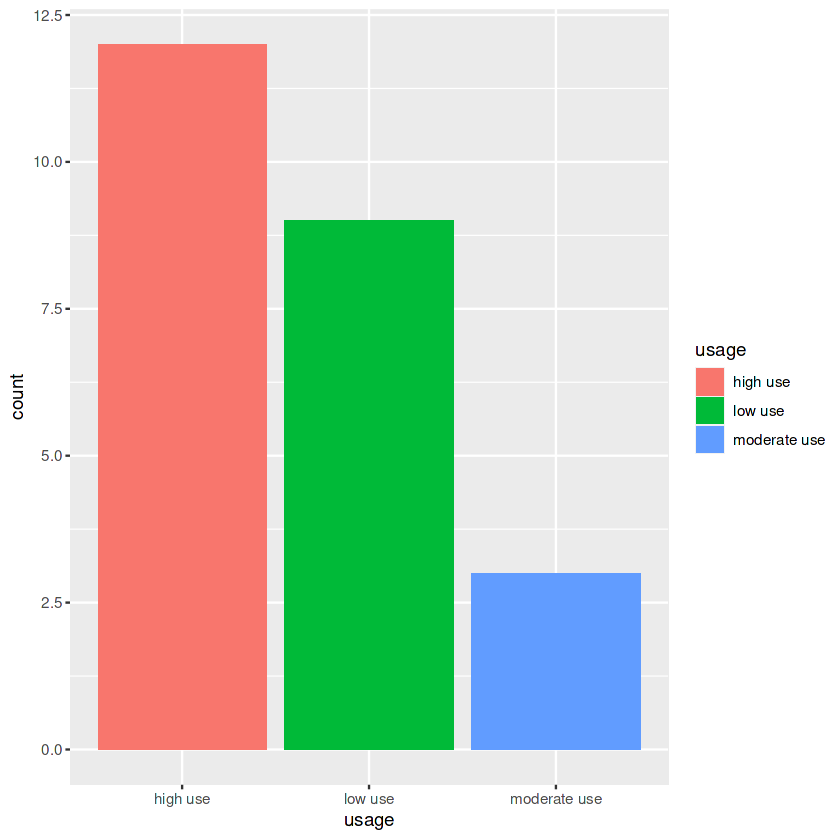

In [18]:
ggplot(data=daily_use)+
  geom_bar(mapping=aes(x=usage, fill=usage))

### 6.5.4.1 INSIGHTS
Analyzing our data, we can see that:
* Most participants use the smart device even though there's also significant amount of participants who don't use the device.

### 6.5.5 Visualisation of BMI against steps and calories

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


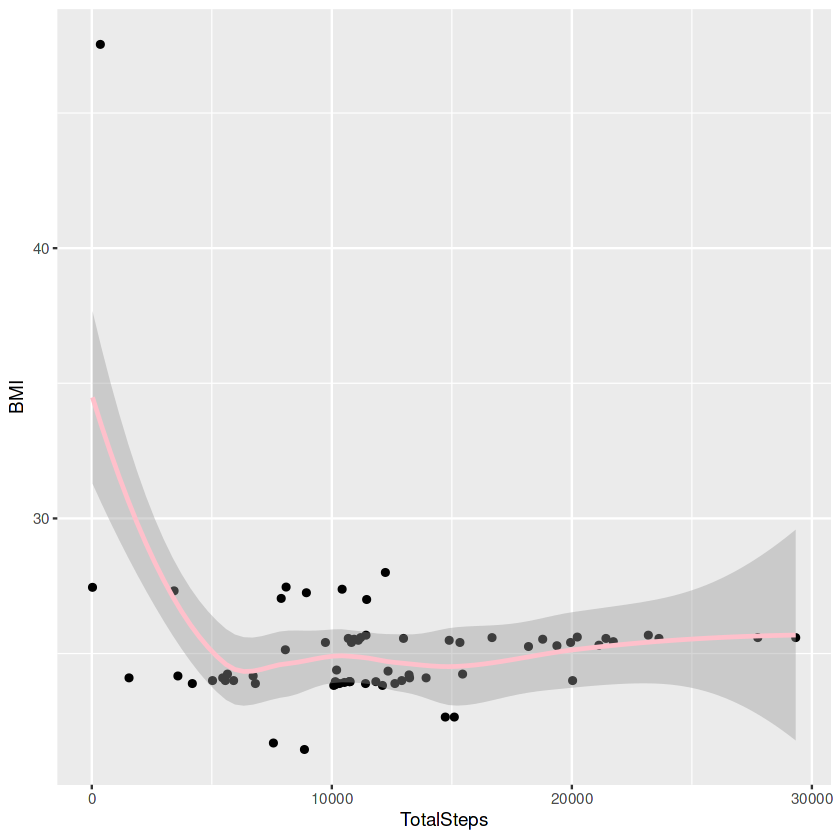

In [19]:
ggplot(data = daily_activity_weight, aes(x = TotalSteps, y = BMI)) +
  geom_point() +
  geom_smooth(col = 'pink')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


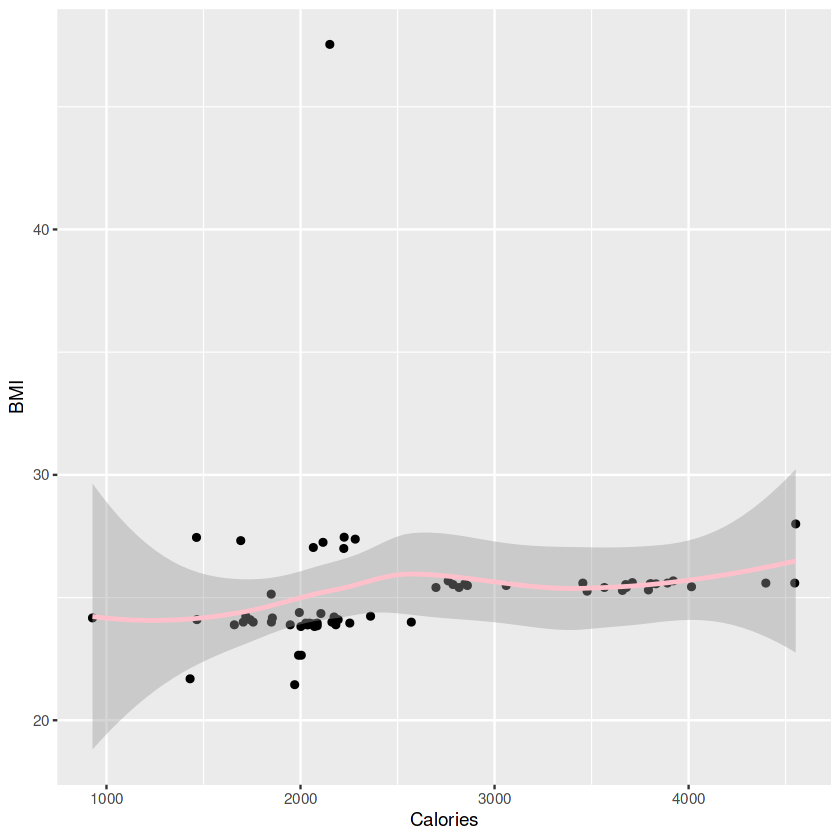

In [20]:
ggplot(data = daily_activity_weight, aes(x = Calories, y = BMI)) +
  geom_point() +
  geom_smooth(col = 'pink')

### 6.5.5.1 INSIGHTS
Both plots above show that users with lower BMI take more steps and burn more calories

### 6.5.6 Visualization for Most active day of the week
* First i'll extract the days of the week from the date then proceed to analyze.

In [21]:
Day <- daily_activity_cleaned %>%
  mutate(DayOfWeek = weekdays(Date))
View(Day)

Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday
1503960366,2016-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921,Monday
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,Tuesday
1503960366,2016-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786,Wednesday


#### Plot for Days of the week

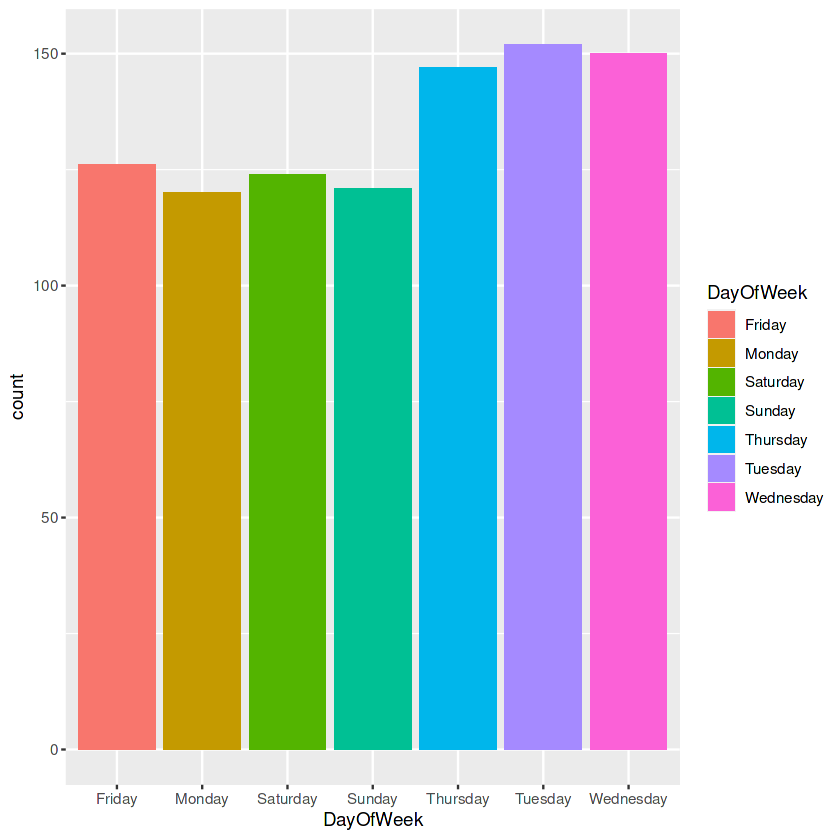

In [22]:
ggplot(data=Day,)+
  geom_bar(mapping=aes(x=DayOfWeek, fill=DayOfWeek))

### 6.5.6.1 INSIGHTS
Peak user engagement is observed mid-week, particularly on Tuesday and Wednesday, in terms of the number of times users utilized the app per day. Conversely, Sunday and Monday demonstrates the lowest engagement, suggesting potential opportunities to enhance user activity on these days.

# 7. Findings
**Average Steps per Day:** Participants take an average of 7638 steps daily, indicating their level of physical activity.

**Sedentary Behavior:** On average, participants spend 991 minutes in sedentary activities, highlighting potential areas for improvement in physical activity levels.

**Sleep Duration:** Participants sleep for an average of 419 minutes and stay in bed for 458 minutes, suggesting a relatively consistent sleep pattern.

**Calories Burned:** The average daily calorie expenditure is 2304, which provides insight into participants' energy expenditure.

**Activity Level:** More participants are lightly active, indicating the predominant activity intensity level among users.

**Heart Rate:** The average heart rate among users is 77 beats per minute (bpm), which may serve as a reference for assessing cardiovascular health.

**Weight and BMI:** Users have an average weight of 72kg and an average BMI of 25.19, indicating the distribution of body weight among participants.

**In addition to these,**

**Correlation between Steps and Calories:** There is a clear positive correlation between the number of steps taken and the calories expended. This suggests that as the number of steps walked increases, there is a corresponding increase in potential calories burned.

**Steps Taken and Sleep Duration:** Interestingly, there seems to be no discernible correlation between the total number of steps taken and the total minutes asleep, indicating that physical activity may not directly affect sleep duration among participants.

**Device Usage:** It's noteworthy that while most participants use the smart device, there is also a significant proportion who don't use it, suggesting potential areas for increasing user engagement or addressing barriers to adoption.

**BMI and Activity:** Both plots reveal that users with lower BMI tend to take more steps and burn more calories, indicating a potential relationship between BMI and physical activity levels.

**User Engagement Trends:** Peak user engagement is observed mid-week, particularly on Tuesday and Wednesday, in terms of the number of times users utilize the app per day. Conversely, Sunday and Monday demonstrate the lowest engagement, indicating potential opportunities to enhance user activity on these days.



# 8. Recommendations

Based on the insights gathered from the analysis, here are some recommendations for Bellabeat:
**Encourage Physical Activity:** Develop features in smart devices and the app to promote physical activity, such as reminders, personalized goals, and guided workouts.

**Improve Sleep Quality:** Provide insights and tips within the app to enhance sleep quality, including tracking sleep patterns and offering relaxation techniques.

**Enhance Calorie Management:** Offer tools for better calorie intake and expenditure management, like tracking, meal planning, and nutritional information.

**Promote Heart Health:** Utilize average heart rate data to provide insights into cardiovascular health and offer guidance on maintaining a healthy heart rate.

**Tailor Marketing Strategies:** Customize marketing campaigns based on BMI categories, focusing on promoting activity and healthy choices tailored to different user demographics.

**Enhance User Engagement:** Implement strategies to increase engagement, particularly on low-activity days like Sundays and Mondays, through incentives, new features, and community support.

**Additionally:**

Implement personalized activity goals to motivate users and manage calorie expenditure effectively.
Provide educational content on sleep hygiene and integrate features to support healthy sleep habits.
Conduct user surveys to understand barriers to device usage and address them through improved onboarding and user experience.
Develop fitness programs tailored to different BMI levels and incentivize user engagement through rewards.
Strategically schedule app updates and promotions to align with peak engagement periods and boost user activity and retention.
By incorporating these recommendations, Bellabeat can empower users to lead healthier lives and solidify its position as a leader in smart wellness solutions.